## 0. Imports

### 0.1 Libraries

In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
from datetime import datetime

from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split

### 0.2 Notebook settings

In [439]:
## Settings
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [16, 10]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    # configura o pandas para quantidade de casas decimeis
    pd.set_option('display.float_format', lambda x: '%.2f' % x)

    sns.set()
jupyter_settings()

## 1. Load and inspect data

### 1.1 Load data

In [440]:
df_raw = pd.read_csv('vehicle_1Mb.csv', index_col='Unnamed: 0').sort_index()
df_raw.head(10).T

,2933,7935,11470,13375,17790,18177,18814,20676,22523,24738
id,7313063003,7310405079,7316243724,7304641153,7310073532,7305845367,7316257557,7304237935,7309243406,7306602728
url,https://huntsville.craigslist.org/ctd/d/lawren...,https://fairbanks.craigslist.org/ctd/d/fairban...,https://phoenix.craigslist.org/evl/ctd/d/mesa-...,https://prescott.craigslist.org/ctd/d/prescott...,https://fayar.craigslist.org/ctd/d/branson-201...,https://fayar.craigslist.org/ctd/d/bentonville...,https://jonesboro.craigslist.org/ctd/d/melbour...,https://littlerock.craigslist.org/ctd/d/sherwo...,https://bakersfield.craigslist.org/ctd/d/baker...,https://chico.craigslist.org/ctd/d/chico-2015-...
region,huntsville / decatur,fairbanks,phoenix,prescott,fayetteville,fayetteville,jonesboro,little rock,bakersfield,chico
region_url,https://huntsville.craigslist.org,https://fairbanks.craigslist.org,https://phoenix.craigslist.org,https://prescott.craigslist.org,https://fayar.craigslist.org,https://fayar.craigslist.org,https://jonesboro.craigslist.org,https://littlerock.craigslist.org,https://bakersfield.craigslist.org,https://chico.craigslist.org
price,24900,27999,29981,15590,16990,0,41995,0,22590,20590
year,2012.00,2017.00,2018.00,2013.00,2017.00,2019.00,2018.00,2007.00,2020.00,2015.00
manufacturer,chevrolet,buick,lincoln,mini,chevrolet,chevrolet,chevrolet,mini,buick,volkswagen
model,silverado 2500,envision,mkc,hardtop cooper s hatchback,express passenger,equinox lt,silverado 1500,cooper sport,encore gx select sport,eos komfort
condition,NaN,NaN,NaN,good,good,good,NaN,like new,good,good
cylinders,NaN,4 cylinders,NaN,NaN,8 cylinders,NaN,8 cylinders,4 cylinders,NaN,NaN


### 1.1 Inspect data

In [441]:
df_raw.describe()

,id,price,year,odometer,county,lat,long
count,304.00,304.00,304.00,297.00,0.00,301.00,301.00
mean,7311442963.86,17330.21,2011.11,94700.59,NaN,38.25,-95.25
std,4503619.08,15122.03,10.60,86840.85,NaN,5.83,19.38
min,7301661510.00,0.00,1923.00,1.00,NaN,19.64,-157.90
25%,7307753901.50,5971.25,2009.00,38907.00,NaN,34.25,-116.29
50%,7312816107.00,13998.00,2014.00,87000.00,NaN,38.62,-87.99
75%,7315379265.75,25990.00,2017.00,132000.00,NaN,42.30,-81.68
max,7317032572.00,90500.00,2021.00,1111111.00,NaN,64.82,38.50


In [442]:
df_raw.isnull().sum(), df_raw.isnull().sum().sum()

(id                0
 url               0
 region            0
 region_url        0
 price             0
 year              0
 manufacturer      8
 model             0
 condition       112
 cylinders       122
 fuel              2
 odometer          7
 title_status      9
 transmission      3
 VIN             104
 drive            94
 size            215
 type             61
 paint_color      95
 image_url         0
 description       0
 county          304
 state             0
 lat               3
 long              3
 posting_date      0
 dtype: int64,
 1142)

## 2. Data preparation

### 2.1 Delete irrelevant or unusable column

In [443]:
filter_list = ['id','county','url','region_url','image_url','description', 'VIN']
df_raw = df_raw.drop(filter_list, axis=1)

### 2.2 Ajust data types


In [444]:
df_raw['posting_date'] = pd.to_datetime(df_raw['posting_date'])
df_raw.year = df_raw.year.astype('int64')

### 2.3 Input missing values

In [445]:
df_num = df_raw.select_dtypes(include=['int64','float64'])
df_cat = df_raw.select_dtypes(include='object')
num_cols = list(df_num)
cat_cols = list(df_cat)
print('Numerical: ', num_cols)
print('Categorical: ', cat_cols)

Numerical:  ['price', 'year', 'odometer', 'lat', 'long']
Categorical:  ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'posting_date']


In [446]:
for col in num_cols:
    df_raw[col] = df_raw[col].fillna(df_raw[col].median())
for col in cat_cols:
    df_raw[col] = df_raw[col].fillna('unknown')

In [447]:
df_raw.isnull().sum().sum()

0

## 3. EDA

### 3.1 Numerical variables

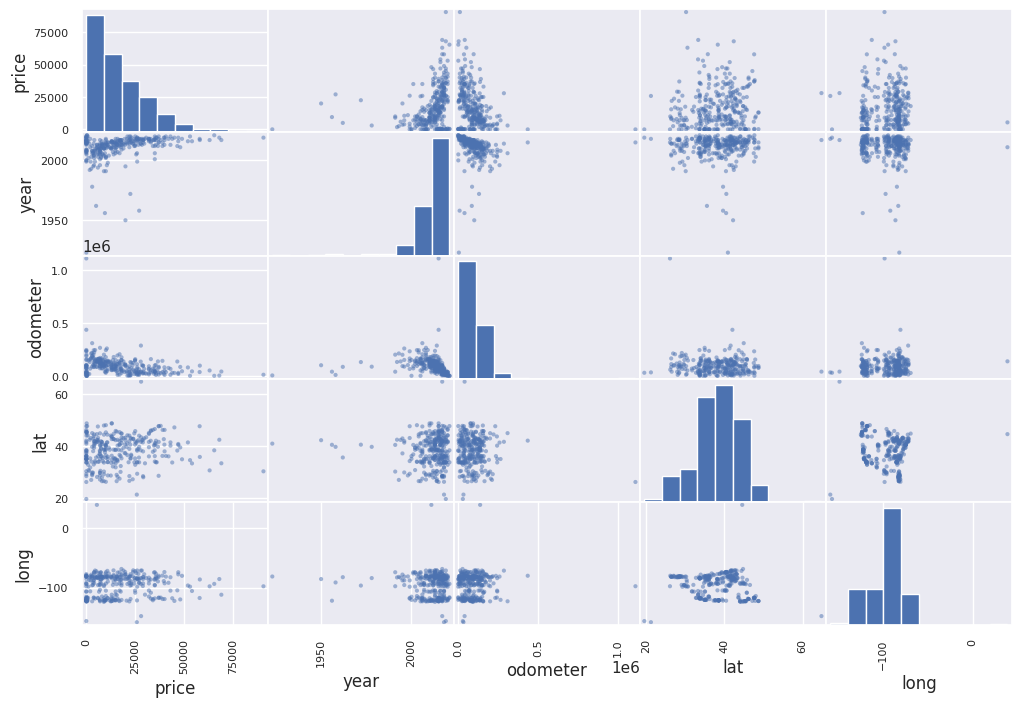

In [448]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_num, figsize=(12, 8));

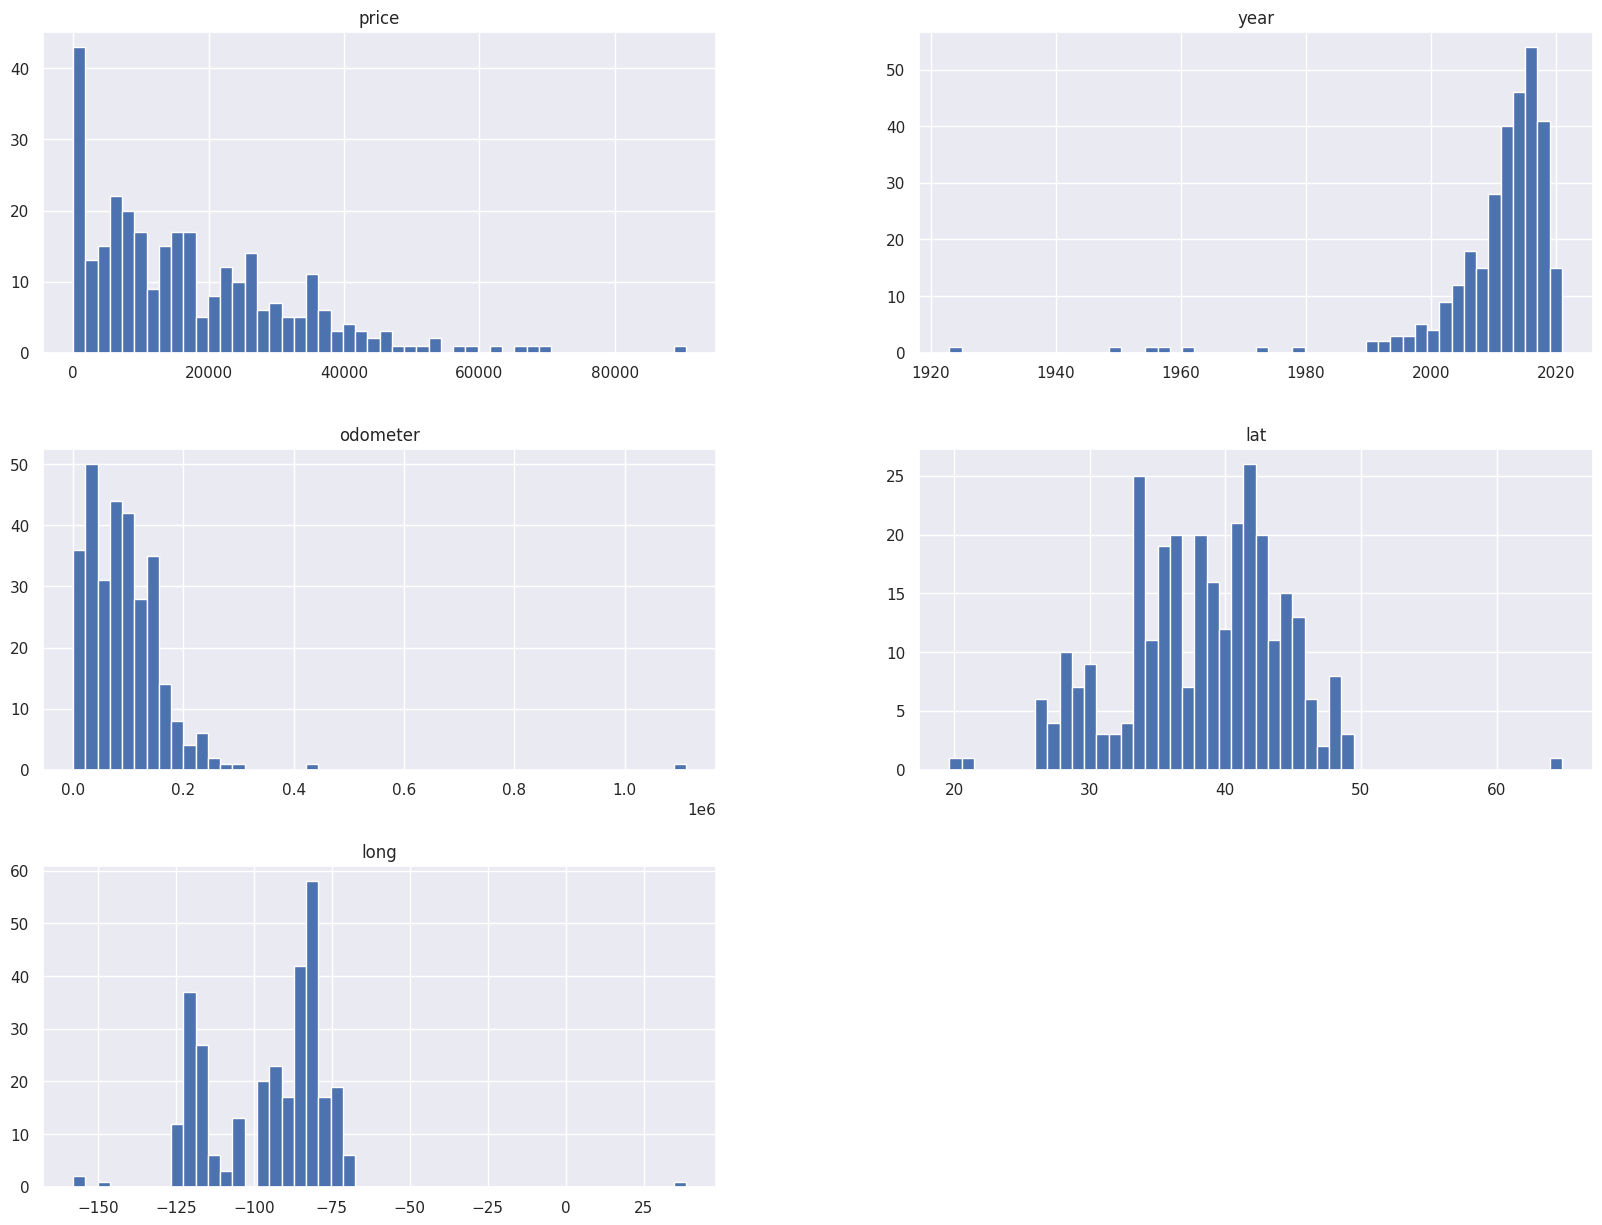

In [449]:
df_raw.hist(bins=50, figsize=(20,15));

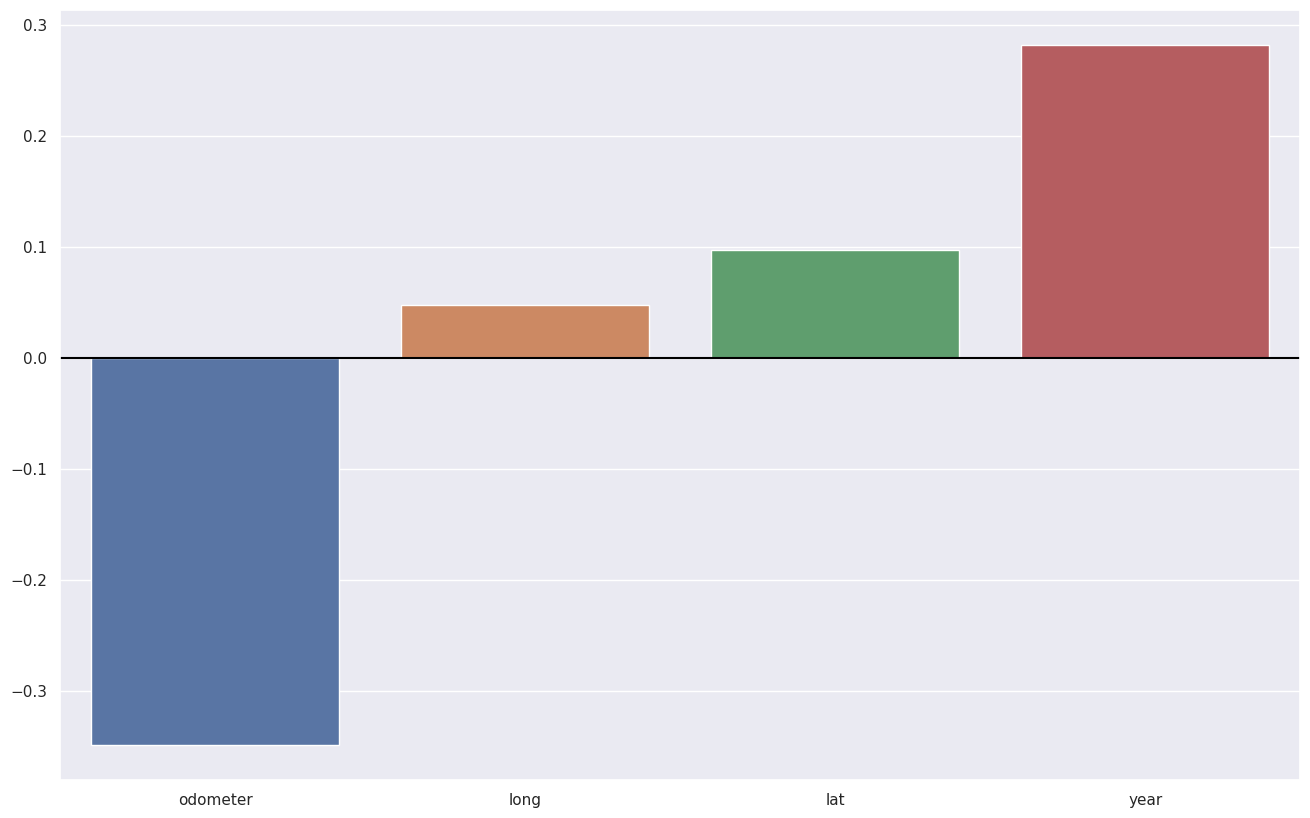

In [450]:
corr = df_num.drop('price', axis=1).corrwith(df_num.price).sort_values()
sns.barplot(x=corr.index, y=corr.values)
plt.axhline(0, linestyle='-', color='0')
plt.show()

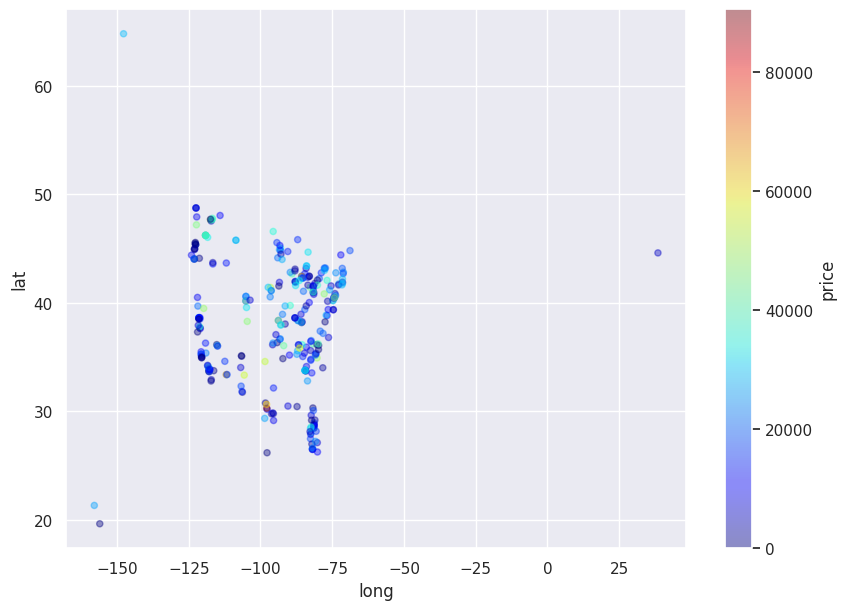

In [451]:
df_raw.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(10,7),
 c="price", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.show()

### 3.1 Categorical variables

In [452]:
df_raw.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

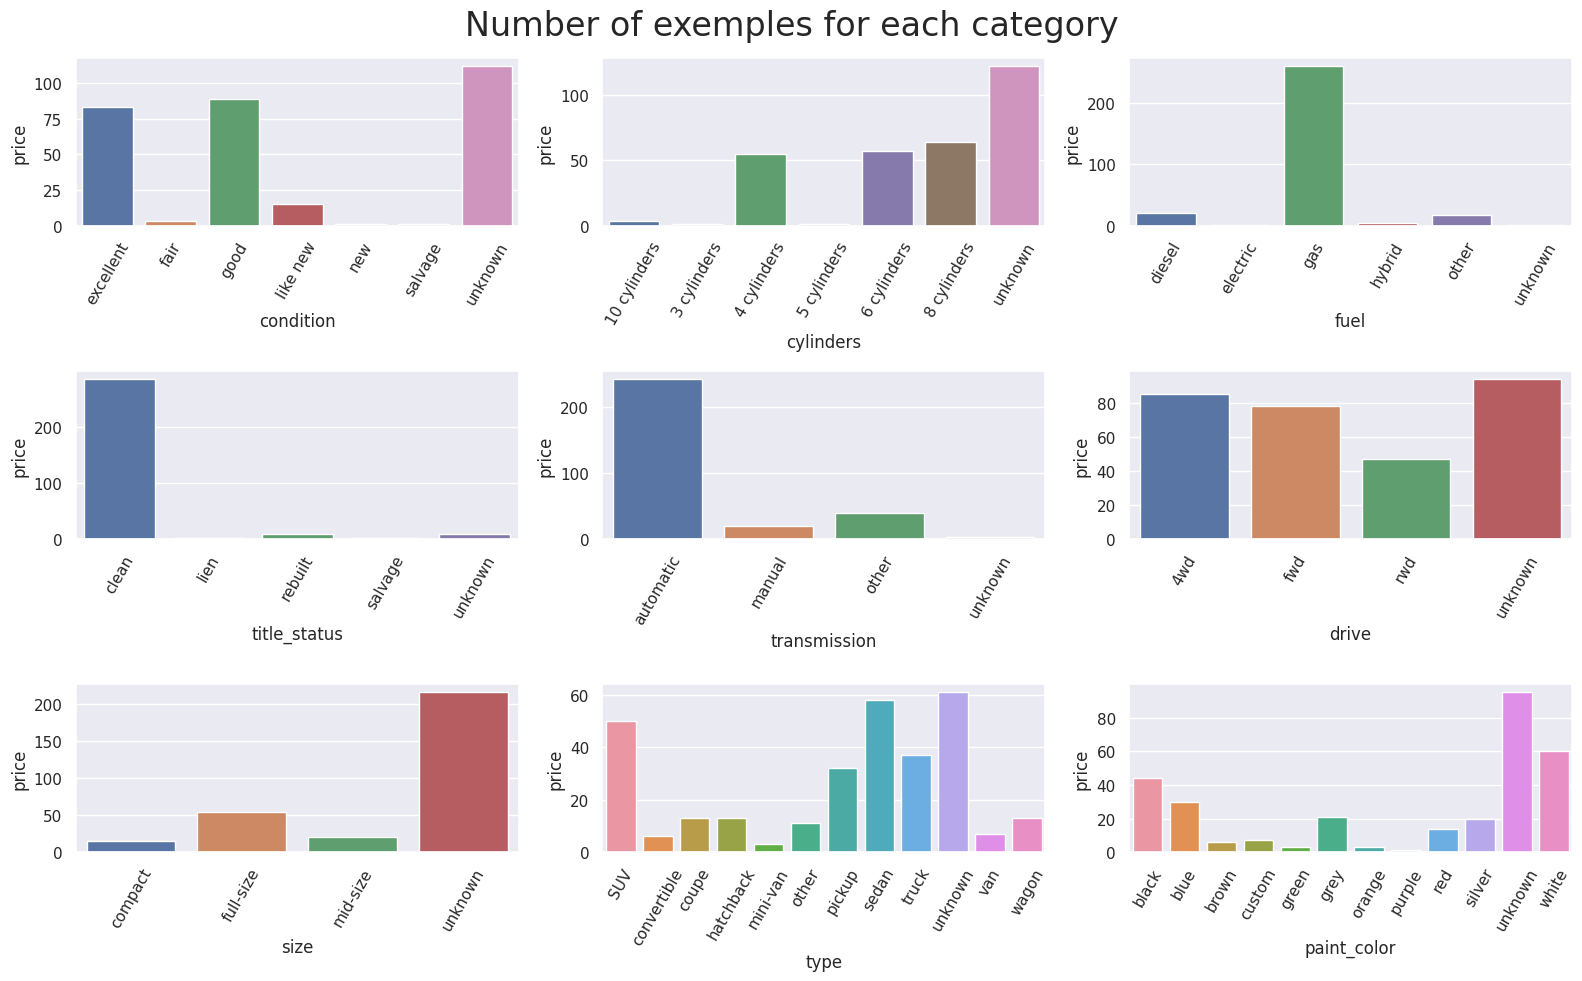

In [453]:
df_aux = df_raw[['condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']]
for index,column in enumerate(df_aux):
    df_gb = df_raw[[column, 'price']].groupby(column).count().reset_index()
    plt.subplot(3,3,index+1)
    sns.barplot(data=df_gb, x=column, y='price')
    plt.xticks(rotation=60)
plt.suptitle('Number of exemples for each category', fontsize=24)
plt.tight_layout()
plt.show()

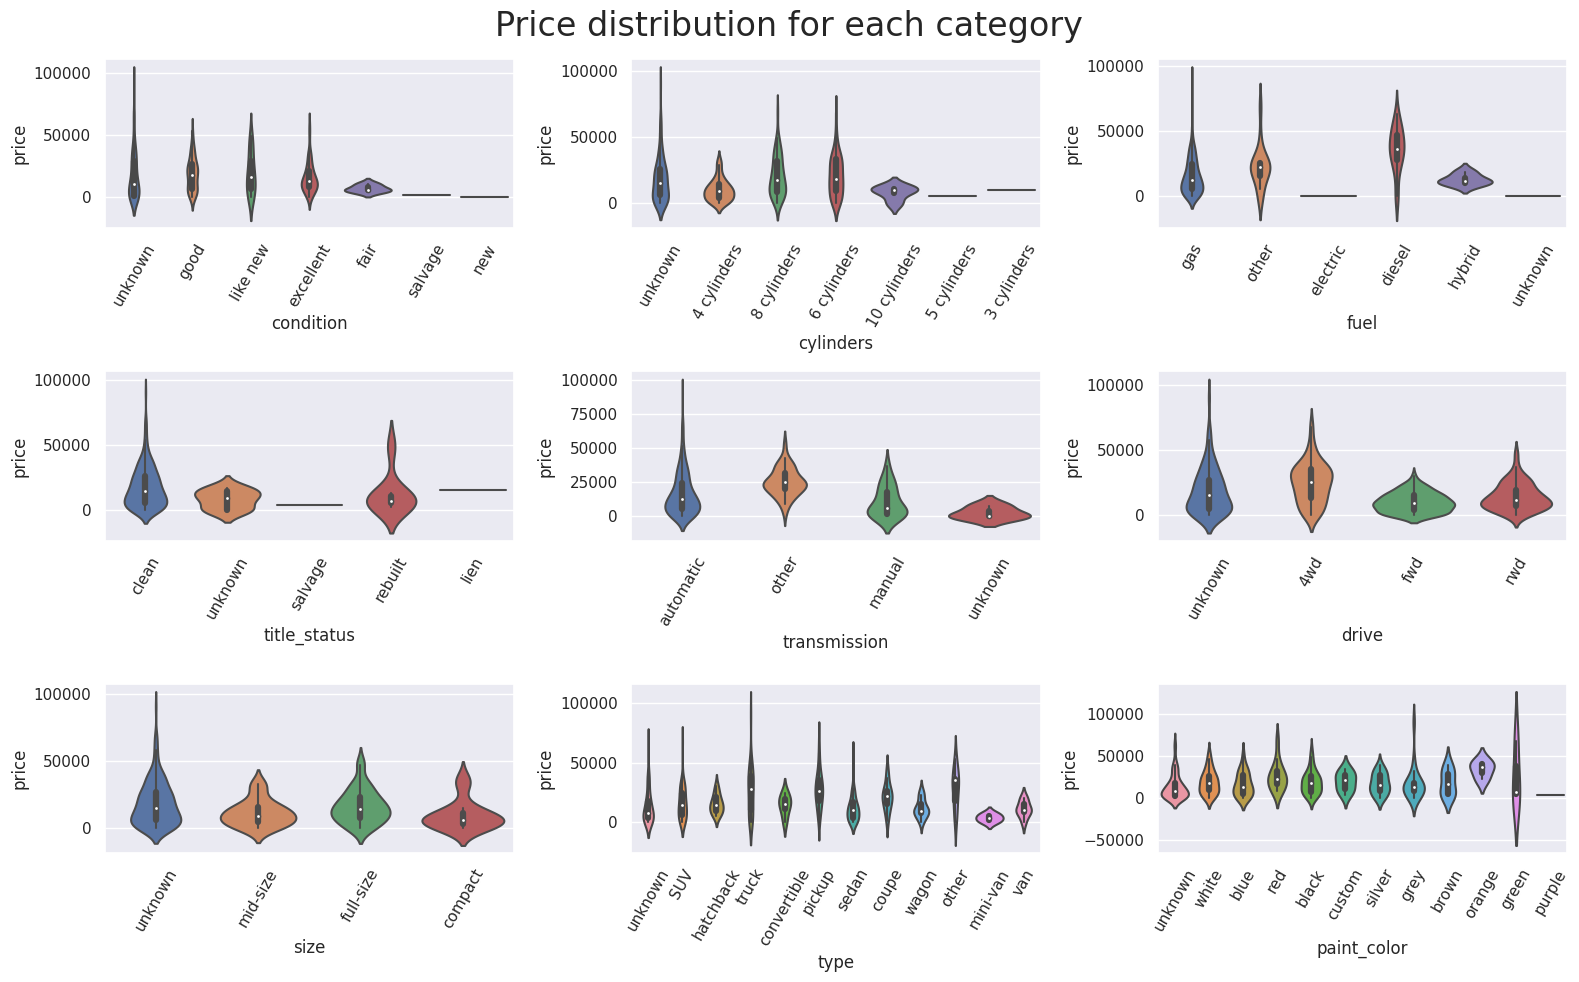

In [454]:

for index,column in enumerate(df_aux):
    df_gb = df_raw[[column, 'price']].groupby(column).mean().reset_index()
    plt.subplot(3,3,index+1)
    sns.violinplot(data=df_raw, x=column, y='price')
    plt.xticks(rotation=60)
plt.suptitle('Price distribution for each category', fontsize=24)
plt.tight_layout()
plt.show()

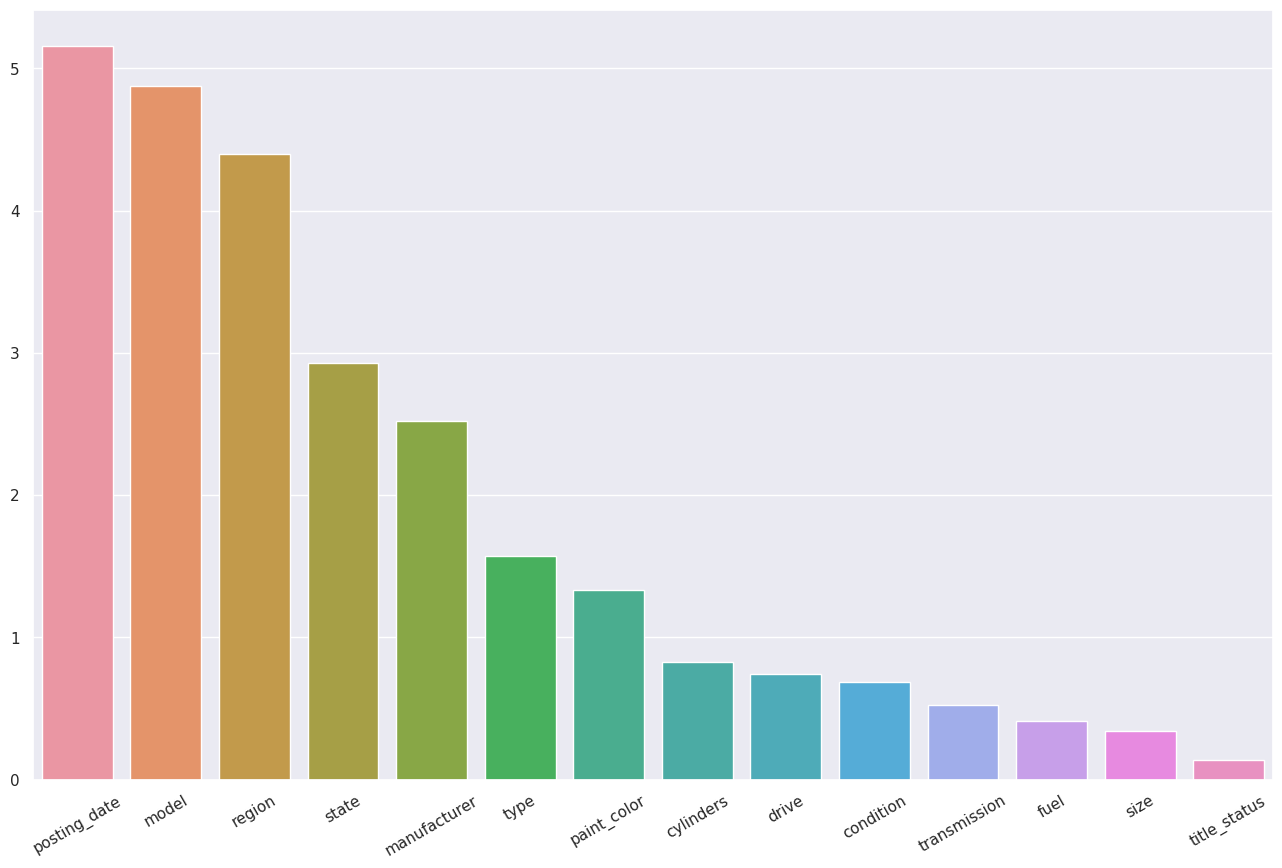

In [455]:
df_aux = df_cat.copy()
df_aux = df_aux.fillna(df_aux.mode().iloc[0])
mutual_info = {}
for column in df_aux:
    score = mutual_info_score(df_num.price, df_aux[column])
    mutual_info[column] = score
df_mutual = pd.Series(mutual_info).sort_values(ascending=False)
sns.barplot(x=df_mutual.index, y=df_mutual.values)
plt.xticks(rotation=30)
plt.show()

### 3.3 Target variable

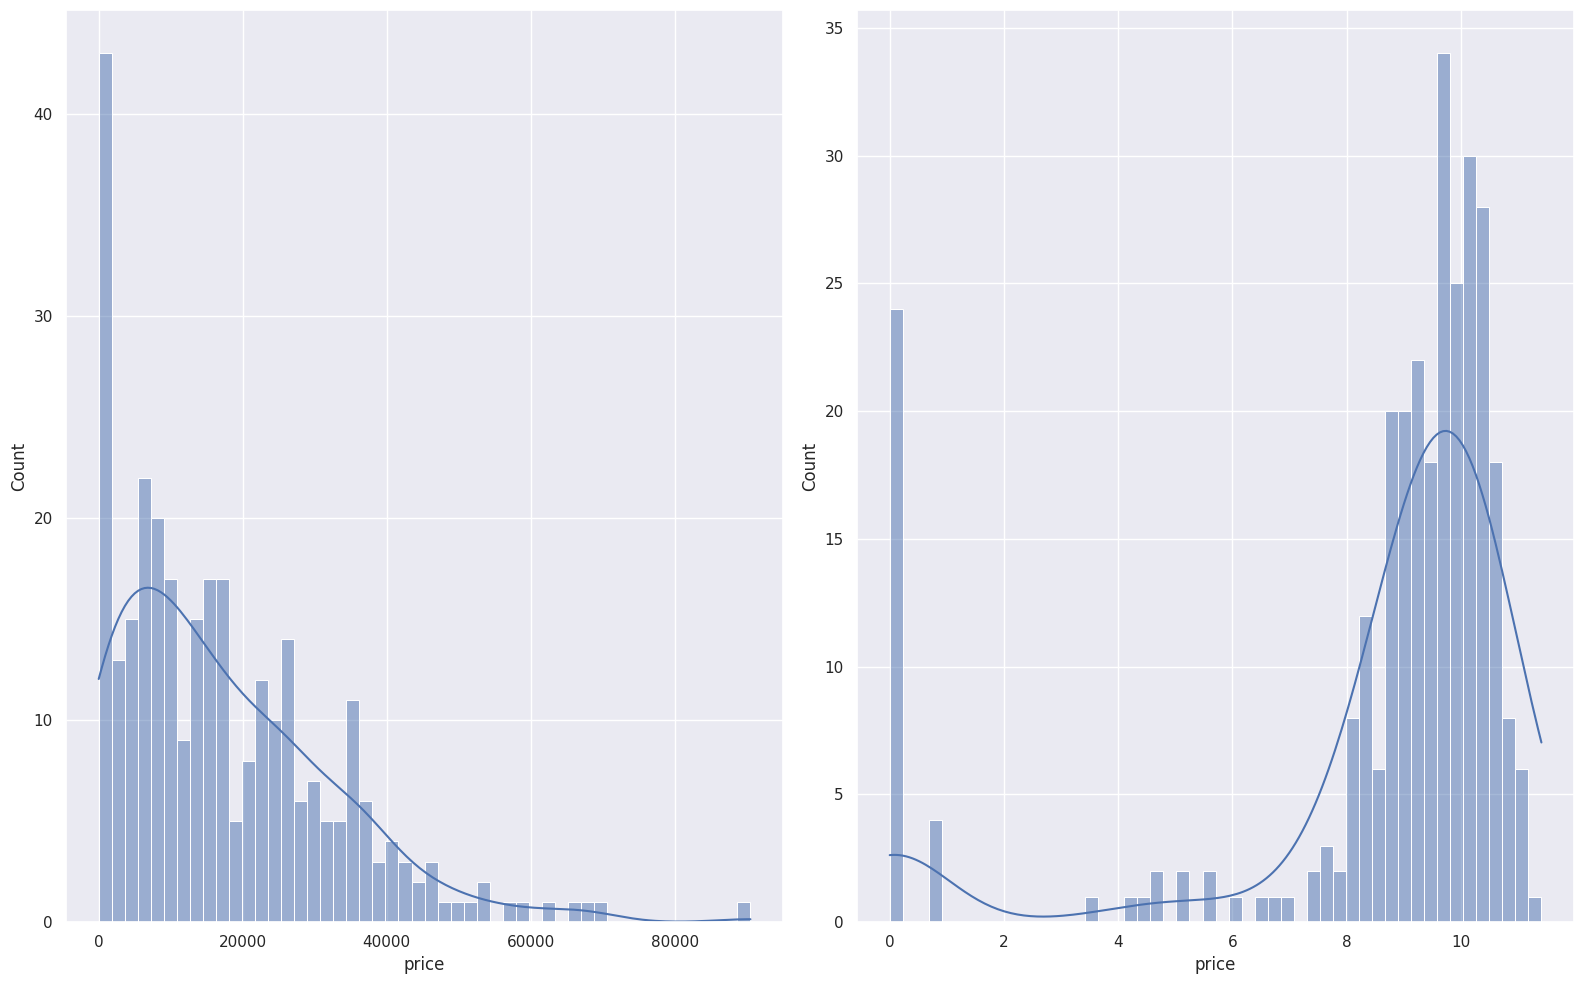

In [456]:
plt.subplot(1,2,1)
sns.histplot(df_raw.price, bins=50, kde=True)
plt.subplot(1,2,2)
sns.histplot(np.log1p(df_raw.price), bins=50, kde=True)
plt.tight_layout()


In [457]:
df_raw[df_raw.price < 700]['price'].value_counts()

0      24
1       4
266     1
65      1
100     1
30      1
186     1
103     1
275     1
87      1
184     1
439     1
Name: price, dtype: int64

In [458]:
df_raw = df_raw[~(df_raw.price < 700)]

## 4. Validation Framework

### 4.1 Split data into train and test data


In [459]:
df_full_train, df_test = train_test_split(df_raw, test_size=0.2, random_state=1)

### 4.2 Split train data into train and validation data


In [460]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [461]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

### 4.3 Check datasets lengths


In [462]:
len(df_train), len(df_val), len(df_test)

(159, 53, 54)

### 4.4 Separate features from target variable


In [463]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [464]:
del df_train['price']
del df_val['price']
del df_test['price']

## 5. Feature Engineering

In [465]:
print(list(df_full_train))

['region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long', 'posting_date']


Mutual Information: 0.5176828800484562


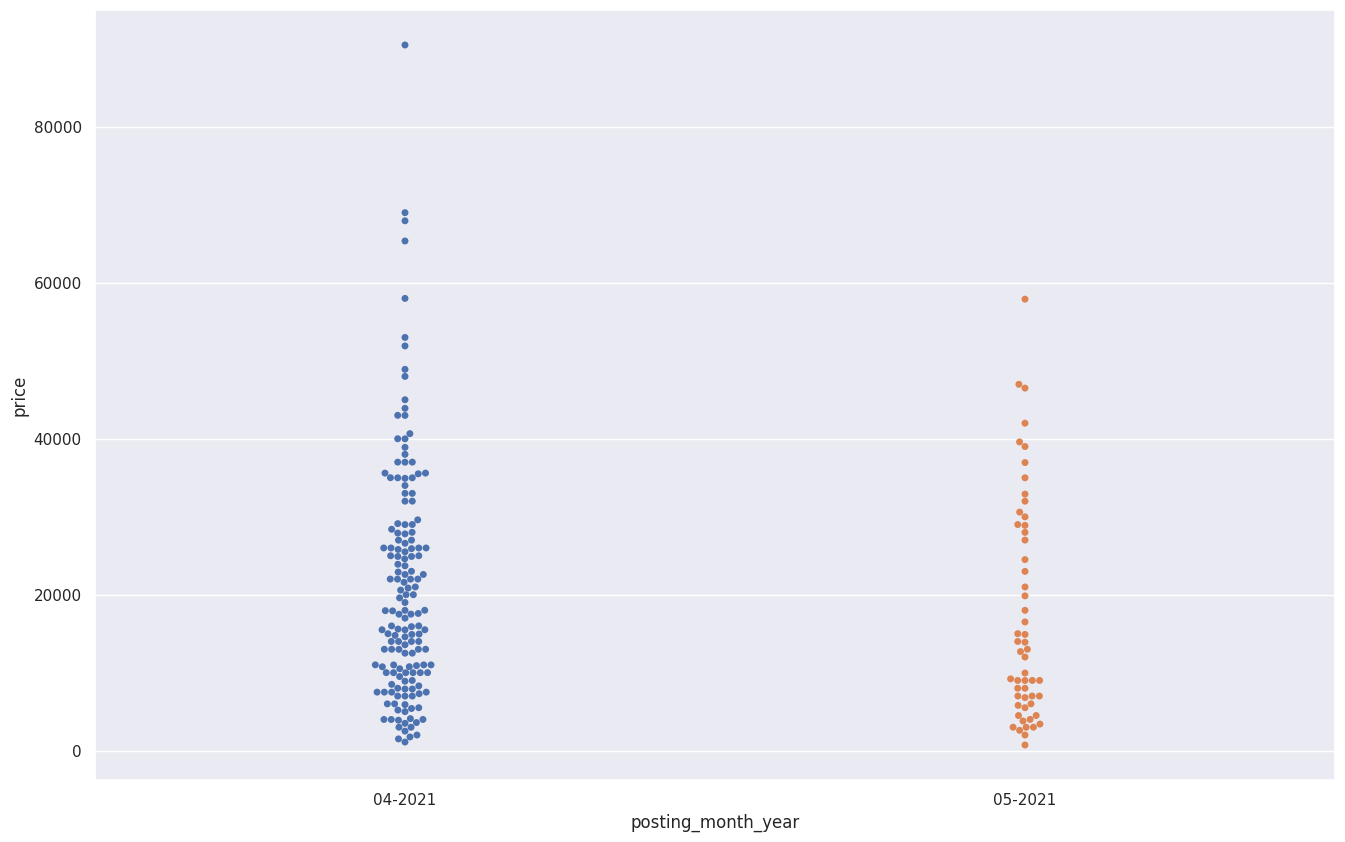

In [466]:
from sklearn.metrics import mutual_info_score
from statistics import correlation
n = len(df_full_train)
for i in range(0,n):
    df_full_train.loc[i,'posting_month_year'] = df_full_train.loc[i,'posting_date'].strftime('%m-%Y')
sns.swarmplot(data=df_full_train, x='posting_month_year', y='price')
print('Mutual Information:', mutual_info_score(df_full_train.price, df_full_train.posting_month_year))

Mutual Information: 1.6984155861112686


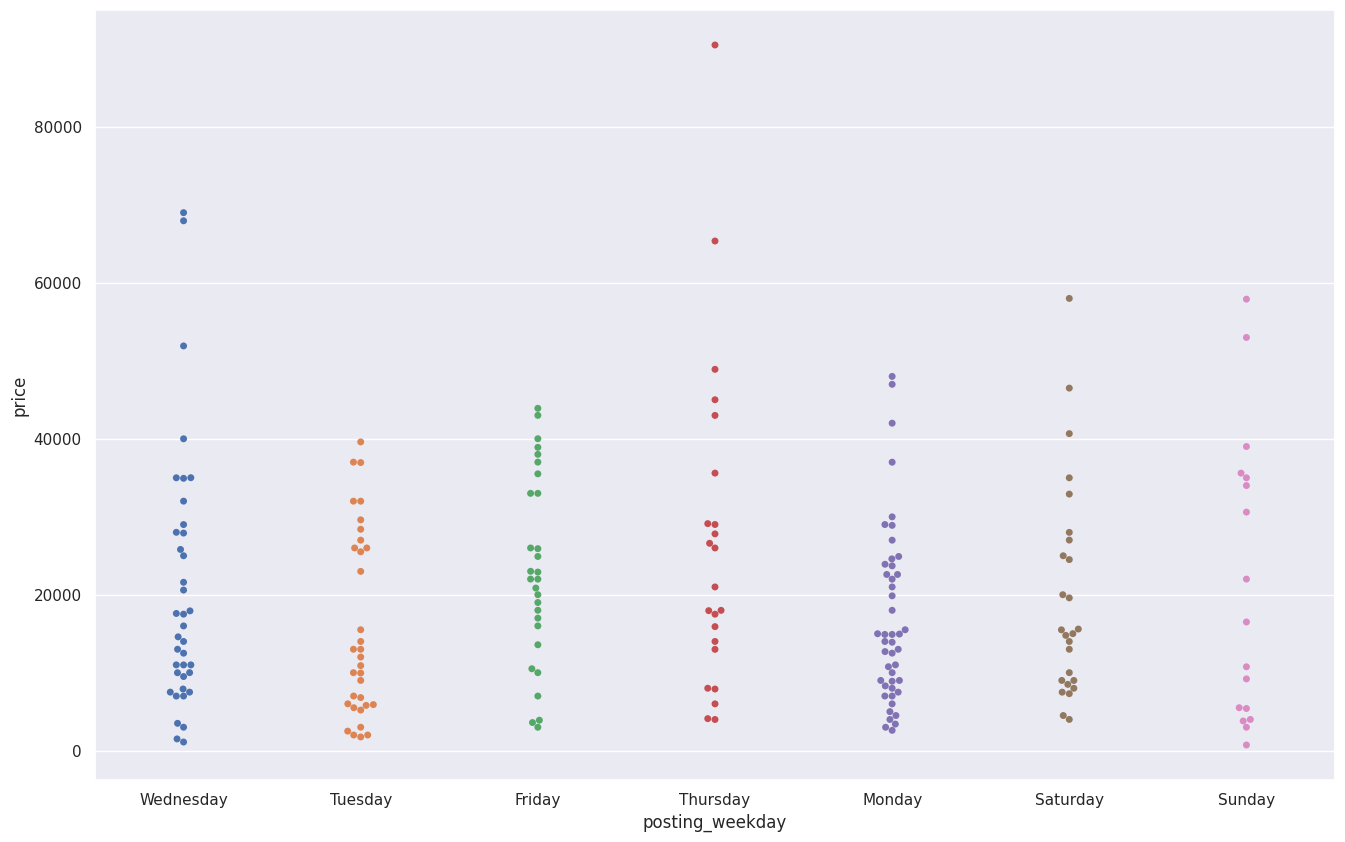

In [467]:
from sklearn.metrics import mutual_info_score
n = len(df_full_train)
for i in range(0,n):
    df_full_train.loc[i,'posting_weekday'] = df_full_train.loc[i,'posting_date'].strftime('%A')
sns.swarmplot(data=df_full_train, x='posting_weekday', y='price')
print('Mutual Information:', mutual_info_score(df_full_train.price, df_full_train.posting_weekday))

Mutual Information: 1.6984155861112686


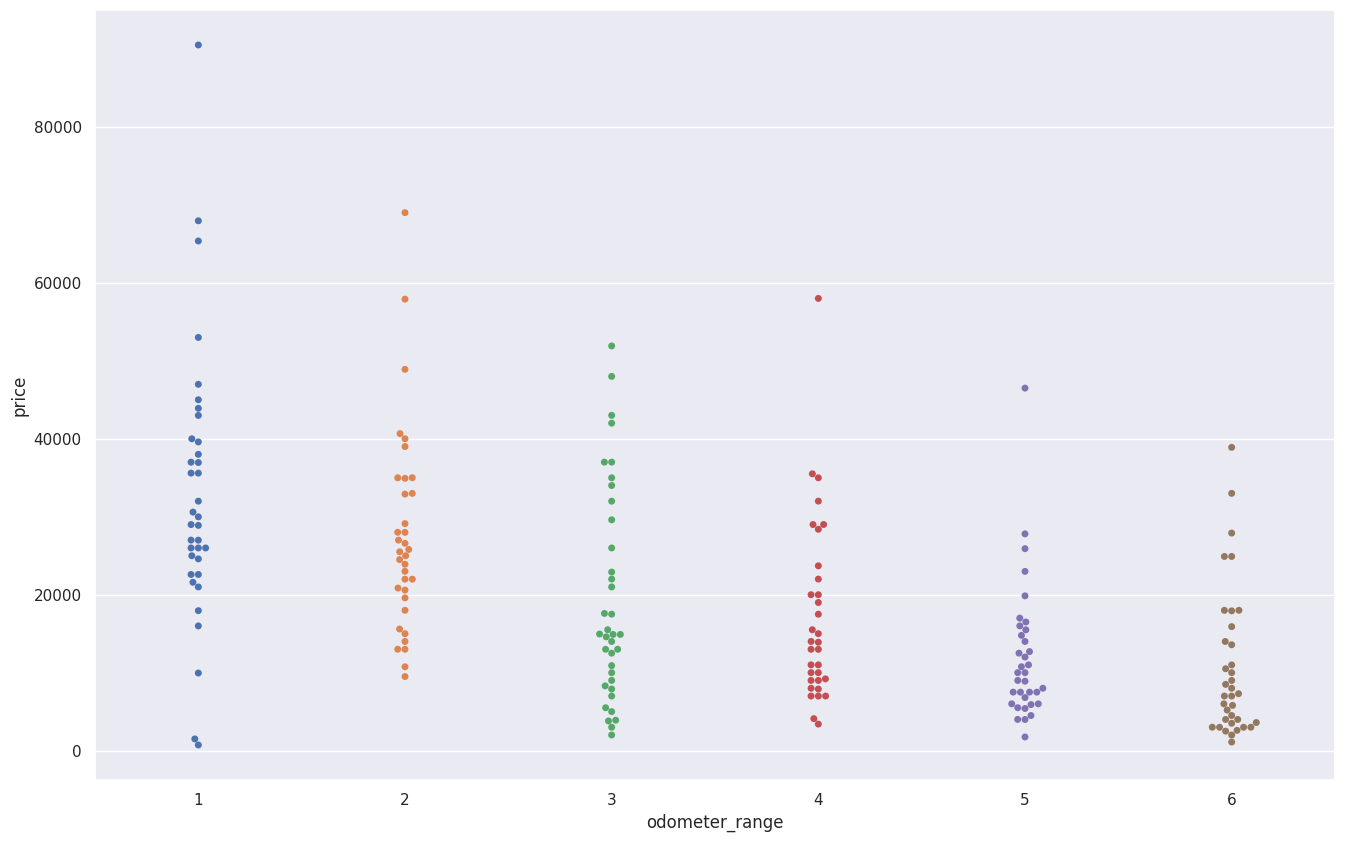

In [468]:
from sklearn.metrics import mutual_info_score

print('Mutual Information:', mutual_info_score(df_full_train.price, df_full_train.posting_weekday))
df_full_train['odometer_range'] = pd.qcut(x=df_full_train['odometer'], labels=[1,2,3,4,5,6], q=6)
sns.swarmplot(data=df_full_train, x='odometer_range', y='price');

Nenhuma das features criadas serão utilizadas por não acrescentarem informações relevantes

## 6. Baseline model

In [483]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# data preparation and feature selection
fill_mode = lambda col: col.fillna(col.mode())
df_train.apply(fill_mode, axis=0)

cat_attribs_ = ['region', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state']

cat_attribs = ['condition','cylinders', 'transmission',
       'drive', 'size', 'paint_color']

num_attribs = ['odometer']

encoder = OneHotEncoder(handle_unknown='infrequent_if_exist')

# build pipeline and transform dependent variables
full_pipeline = ColumnTransformer([
       ("cat", encoder, cat_attribs),
 ("num", RobustScaler(), num_attribs)
 ])

# transform target variable's scale
y_train, y_val, y_test = np.log1p(y_train), np.log1p(y_val), np.log1p(y_test)

X_train = full_pipeline.fit_transform(df_train[cat_attribs+num_attribs], y_train);
X_val = full_pipeline.transform(df_val[cat_attribs+num_attribs]);
X_test = full_pipeline.transform(df_test[cat_attribs+num_attribs]);

# Select a model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Predict target (train data)
y_pred = model.predict(X_train)

rmse_int = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred)))
mae_int = mean_absolute_percentage_error(np.exp(y_train), np.exp(y_pred))

print('RMSE (train):', rmse_int)
print('MAE (train):', mae_int)

print('---')

# Predict target (validation data)
y_pred = model.predict(X_val)

rmse_val = np.sqrt(mean_squared_error(np.exp(y_val), np.exp(y_pred)))
mae_val = mean_absolute_percentage_error(np.exp(y_val), np.exp(y_pred))

print('RMSE (val):', rmse_val)
print('MAE (val):', mae_val)

print('---')

# Predict target (test data)
y_pred = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
mae_test = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred))

print('RMSE (test):', rmse_test)
print('MAE (test):', mae_test)


RMSE (train): 0.0031022883313460967
MAE (train): 0.0013973459925929591
---
RMSE (val): 0.002683047927182017
MAE (val): 0.0013610926911818307
---
RMSE (test): 0.0032999923535041997
MAE (test): 0.0016609241169362303


### 6.1 Model evaluation

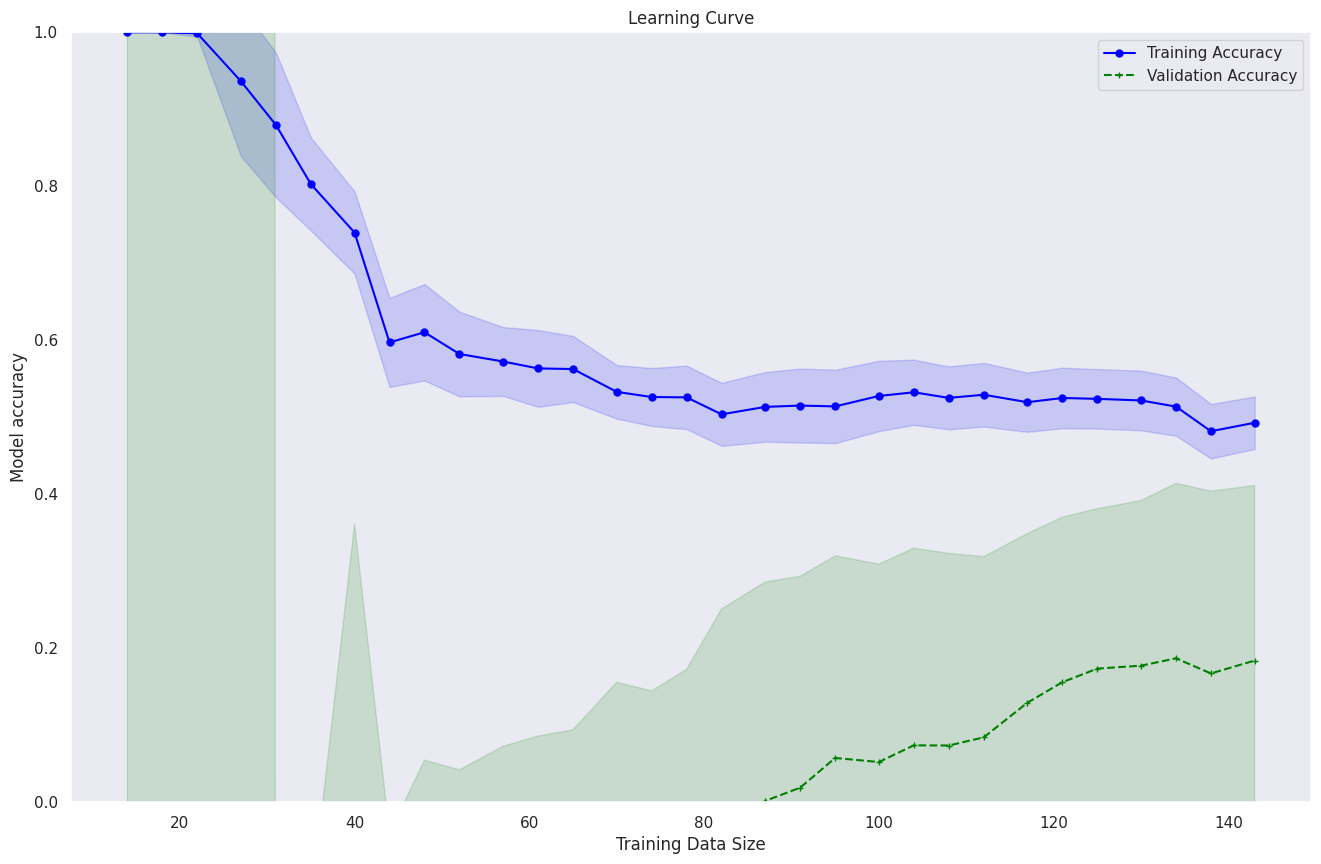

In [484]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 31),
                                                       n_jobs=-1)

# Calculate training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.ylim([0,1])
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='upper right')
plt.show()

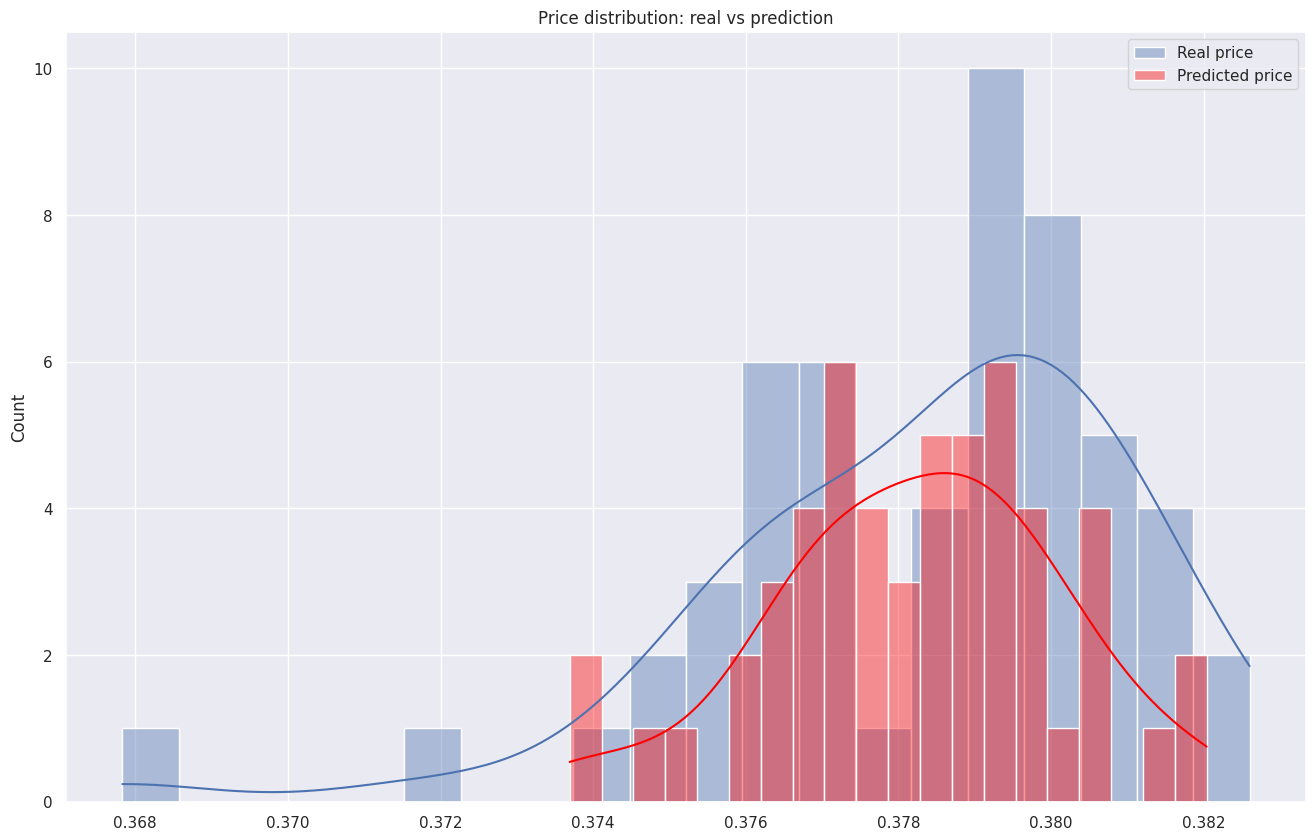

In [487]:
sns.histplot(y_test, bins=20, alpha=0.4, kde=True, label='Real price');
sns.histplot(y_pred, color='red', bins=20, alpha=0.4, kde=True, label='Predicted price');
plt.title('Price distribution: real vs prediction')
plt.legend();

### 6.2 Model interpretation

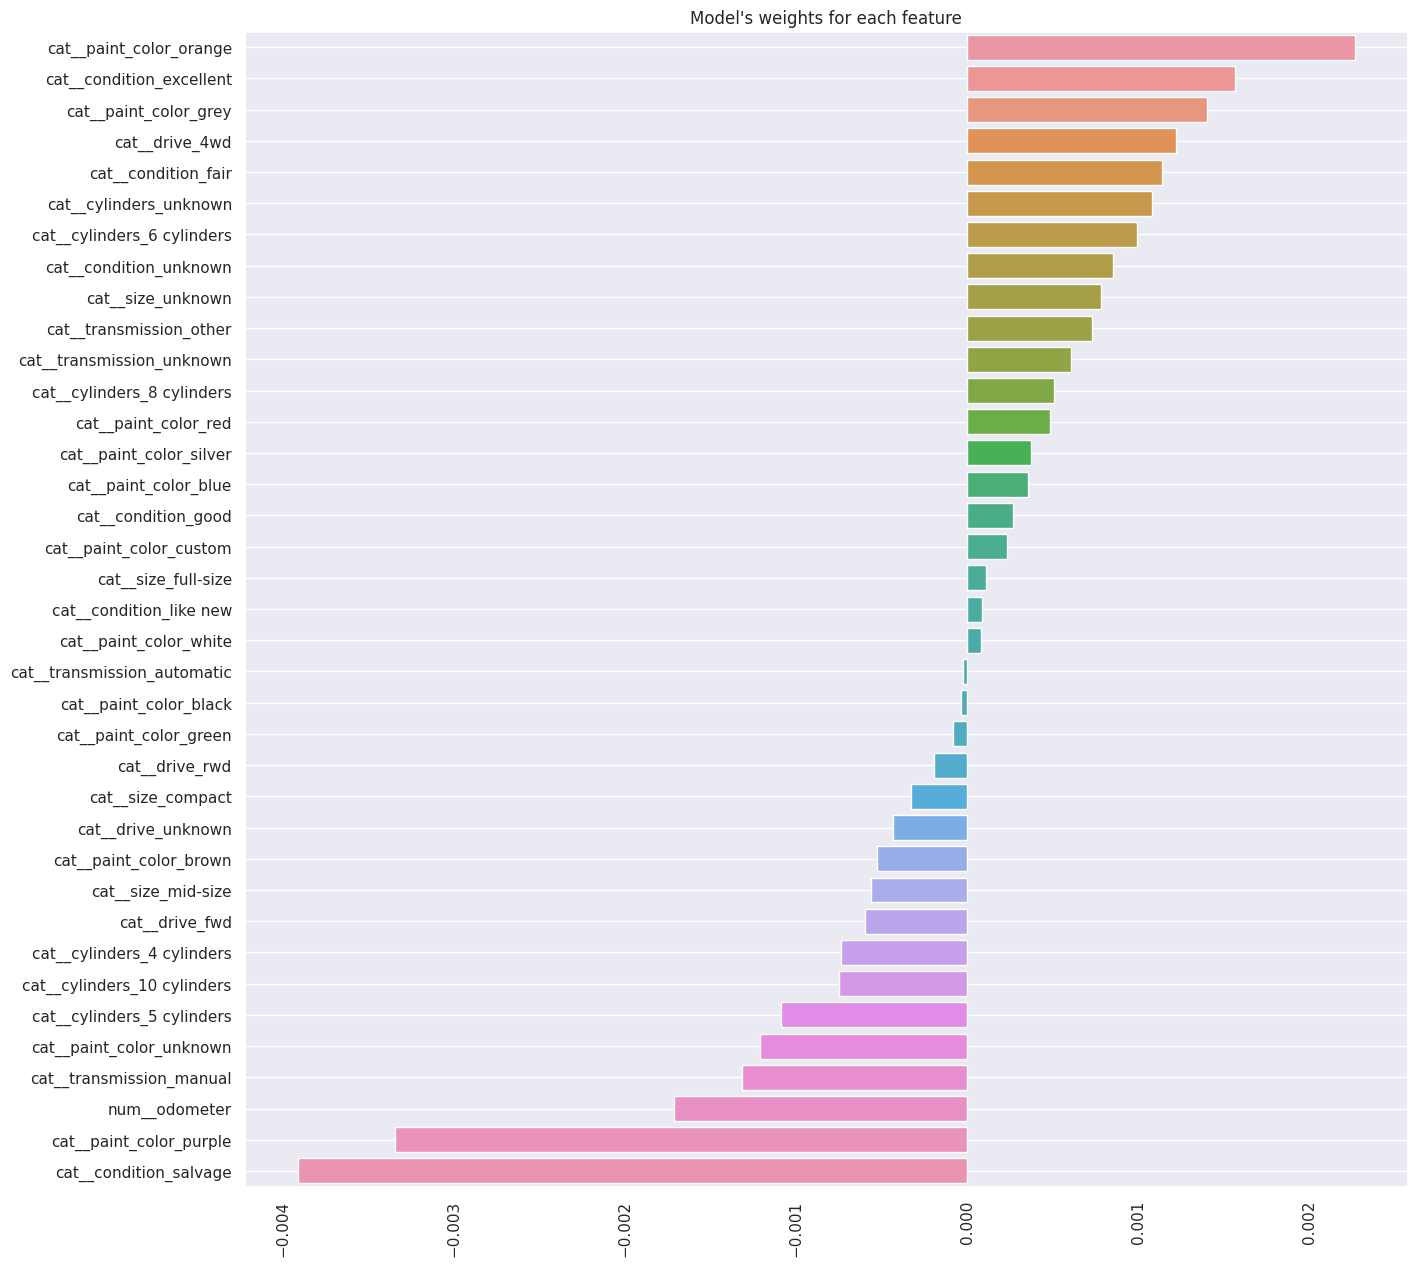

In [488]:
weights = pd.Series(dict(zip(full_pipeline.get_feature_names_out(), model.coef_))).sort_values(ascending=False)
weights.index = [x.replace('=',' = ') for x in list(weights.index)]

plt.figure(figsize=(15,15))
plt.title("Model's weights for each feature")
sns.barplot(y=weights.index, x=weights.values)
plt.xticks(rotation=90)
ax = plt.gca()
ax.yaxis.grid(True) 
ax.xaxis.grid(False) 
plt.show()
